# 1D Linear Regression Using Ordinary Least Squares

Here we will introduce Multiple Linear Regression and compute the weights using Ordinary Least Squares (OLS)

This notebook will give you an algorithm that will work for n number of input features but forst we'll test it on 1D data

## Process

* Loading the data
* Exploring the data
* Adding bias to our input 
* Solve for weights using OLS
* Compute hypothesis
* Fit a line using weights
* Make a Prediction

## Equations

where the hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta^Tx = x_0\theta_0 + \theta_1 x_1$$

where $\theta$ is computed using OLS

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [2]:
%matplotlib inline
import os
import numpy as np

import matplotlib.pyplot as plt

## Loading the Data

In [3]:
data = np.loadtxt('data/population_vs_profit.txt', delimiter=',')
n = len(data[1]) -1
m = len(data)
print("Shape of data", data.shape)
print("Number of features", n)
print("Number of samples", m)
X, y = data[:, n-1], data[:, n]
x = X

Shape of data (97, 2)
Number of features 1
Number of samples 97


## Exploring the data 

### Plot the data

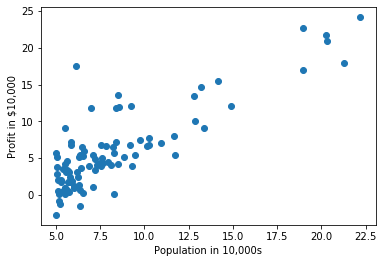

In [4]:
plt.scatter(X, y)
plt.ylabel('Profit in $10,000')
plt.xlabel('Population in 10,000s')
plt.show()

### Visualizing the shape of our data

X is a feature vector that is m x 1 where:

* m = number of samples
* n = number of features

In the case of 1D linear regression n just equals 1

y is our ouput vector that is m x 1

In [5]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)

The shape of X is (97,)
The shape of y is (97,)


## Adding bias to our input

This is adding the b in $y = mx +b$

We will change the way we think about this equation

We will absorb b into our input vector and compute b like we would any other weight

To do this we add a column of 1's to our feature vectors and call it $x_0$ 

In [6]:
# here we add a column of 1's for our bias we'll use stack for numpy arrays with shape (m,)
X = np.stack([np.ones(m), X], axis=1)

print("Shape of X is", X.shape)
print("Example feature vector", X[0])

Shape of X is (97, 2)
Example feature vector [1.     6.1101]


## Solve for weights using OLS

Basically we just need to transform the following function into python code

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

The first value in $\theta$ is our $x_0$

In [7]:
theta = np.linalg.pinv(X.T@X)@X.T@y
print("Shape of theta is", theta.shape)
print("theta is", theta)

Shape of theta is (2,)
theta is [-3.89578088  1.19303364]


## Compute hypothesis

We'll take our input vector X and pretend we dont know our output vector y

then using the weights we found we'll try and predict what y would be at any point

In [8]:
h = X@theta

In [9]:
h.shape

(97,)

# Creating our line of best fit

In [10]:
X[:, 1].shape

(97,)

In [11]:
# Remember X[:, 0] will be all 1's
X[:, 1][0]

6.1101

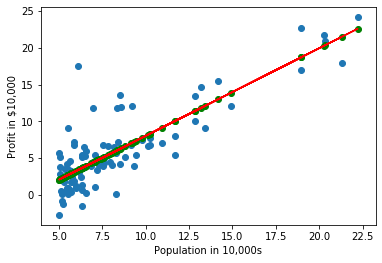

In [12]:
plt.scatter(X[:, 1], y)
plt.scatter(X[:, 1], h, c='green')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population in 10,000s')
plt.plot(X[:, 1], h, c='red')
plt.show()

# Making a prediction

now we can create our own input vector and get an estimated result

In [13]:
# population 15,000
input_vec = [15]

# add a bias since all inputs must begin with 1
input_vec_bias = np.append(1, input_vec)

# make a prediction
profit = theta.T@input_vec_bias

print("Input vector", input_vec)
print("Input vector with bias", input_vec_bias)
print("theta", theta)
print("Profit", profit)

Input vector [15]
Input vector with bias [ 1 15]
theta [-3.89578088  1.19303364]
Profit 13.999723784532058


## Determine how well your model performed

We need some numerical measure to see how well our model performed

For this we can use $R^2$ (R-Squared)

We ususally use this for any regression not just Linear Regression

The definition for R-Squared is the following:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where: 

$SS_{res}$ is the sum of squared residual 

and

$SS_{tot}$ is the sum of squared total

These are defined as:

$$SS_{res} = \sum^N_{i=1}(y_i - \hat{y_i})^2$$

<br />

$$SS_{tot} = \sum^N_{i=1}(y_i - \bar{y})^2$$

$R^2 = 1$ is a perfect model

$R^2 = 0$ is basically the average (50%)

$R^2 = -$ is worse than just computing the average

In [14]:
SSres = sum((y-h)**2)

SStot = sum((y-y.mean())**2)

R2 = 1 - SSres/SStot

print('SSres is: ', SSres)
print('SStot is:', SStot)
print('R-squared is: ', R2)

SSres is:  868.5324469391846
SStot is: 2914.8470516572247
R-squared is:  0.7020315537841397
